# Arules and Pattern Mining

The **`arlues`** package that is being used for mining association rules needs data to be of type factor. Therefore it takes lots of pre processing converting the data to right type for association rule mining. 

This notebook uses auto sales data for resale of cars. This could be a regression problem. The two fields of data **`dateCreated`** and **`lastSeen`** could be indicators of when a car came into the store and when it left the store (or sold). If we take the difference in days then we can try to predict number of days it took for the car to be re sold. 

Here lets try to find if there are patterns of features that occur frequently. Read the data from `/dsa/data/DSA-8630/autos.csv`

**Read the auto_sales data into a variable called auto_sales

In [1]:
Sys.setlocale(locale="C")

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
# code here..
library("arules")
auto_sales = read.csv('/dsa/data/DSA-8630/autos.csv')
head(auto_sales)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


In [3]:
names(auto_sales)
summary(auto_sales)
str(auto_sales)

[1] "dateCrawled"         "name"                "seller"             
 [4] "offerType"           "price"               "abtest"             
 [7] "vehicleType"         "yearOfRegistration"  "gearbox"            
[10] "powerPS"             "model"               "kilometer"          
[13] "monthOfRegistration" "fuelType"            "brand"              
[16] "notRepairedDamage"   "dateCreated"         "nrOfPictures"       
[19] "postalCode"          "lastSeen"

              dateCrawled                      name               seller      
 2016-03-08 15:50:29:     5   Ford_Fiesta        :   336   gewerblich:     2  
 2016-03-20 16:50:22:     5   Volkswagen_Golf_1.4:   335   privat    :189347  
 2016-03-26 10:51:07:     5   BMW_318i           :   334                      
 2016-03-31 17:57:07:     5   Opel_Corsa         :   316                      
 2016-04-02 14:50:21:     5   BMW_316i           :   258                      
 2016-03-05 15:48:41:     4   BMW_320i           :   256                      
 (Other)            :189320   (Other)            :187514                      
   offerType          price              abtest          vehicleType   
 Angebot:189341   Min.   :       0   control:91131   limousine :48701  
 Gesuch :     8   1st Qu.:    1150   test   :98218   kleinwagen:40759  
                  Median :    2950                   kombi     :34498  
                  Mean   :   10895                             :19437  
        

'data.frame':	189349 obs. of  20 variables:
 $ dateCrawled        : Factor w/ 164590 levels "2016-03-05 14:06:22",..: 96234 96080 44613 62122 135465 158918 142369 82743 161561 60299 ...
 $ name               : Factor w/ 128113 levels "!!!!!!!!!!!!!!Renault_Clio_5_Tuerig_Servolenkung_!!!!!!!!!!!!!!!!!",..: 43061 2167 49293 41673 93697 14869 79671 103410 34778 104506 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : int  480 18300 9800 1500 3600 650 2200 0 14500 999 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : int  1993 2011 2004 2001 2008 1995 2004 1980 2014 1998 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : int  

**Trim both the leading and trailing white spaces from name column in auto_sales

In [4]:
auto_sales$name <- trimws(auto_sales$name) 
head(auto_sales)

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


**Replace the underscores between the words in name column with white spaces

In [6]:
auto_sales$name <- chartr("_", " ", auto_sales$name)
head(auto_sales)

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf 3 1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep Grand Cherokee Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF 4 1 4 3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW 316i e36 Limousine Bastlerfahrzeug Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


Lets generate the days column by substracting the **lastSeen** and **dateCreated** columns. 

**Reference: **

- [lubridate](https://www.r-statistics.com/2012/03/do-more-with-dates-and-times-in-r-with-lubridate-1-1-0/)
- [Handling date-times in R](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/ColeBeck/datestimes.pdf)


You can work with dates data type in R using either built-in POSIXt library or external packages like chron package, lubridate package. There are two POSIXt types, POSIXct and POSIXlt. "ct" stands for calendar time, it stores the number of seconds since the origin. "lt", or local time, keeps the date as a list of time attributes (such as "hour" and "mon").

In below piece of code, we are trying to substract two dates. You can directly substract the dates if there are in proper date format. So we are converting them in to Posixt class with a format and then converting them into date type.

In [7]:
# Import lubridate package that has cool functions to play with dates
library(lubridate)

auto_sales$days = as.Date(format(as.POSIXct((auto_sales$lastSeen) ,format = "%Y-%m-%d %X"))) - as.Date(format(as.POSIXct((auto_sales$dateCreated),format ="%Y-%m-%d %X")))


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [9]:
head(auto_sales$days)
names(auto_sales)

Time differences in days
[1] 14 14 22  0  6  2

[1] "dateCrawled"         "name"                "seller"             
 [4] "offerType"           "price"               "abtest"             
 [7] "vehicleType"         "yearOfRegistration"  "gearbox"            
[10] "powerPS"             "model"               "kilometer"          
[13] "monthOfRegistration" "fuelType"            "brand"              
[16] "notRepairedDamage"   "dateCreated"         "nrOfPictures"       
[19] "postalCode"          "lastSeen"            "days"

**Remove the columns dateCrawled, dateCreated and lastSeen from dataframe

In [10]:
# code here..
auto_sales$dateCrawled <- NULL 
auto_sales$dateCreated <- NULL 
auto_sales$lastSeen <- NULL 
names(auto_sales)

[1] "name"                "seller"              "offerType"          
 [4] "price"               "abtest"              "vehicleType"        
 [7] "yearOfRegistration"  "gearbox"             "powerPS"            
[10] "model"               "kilometer"           "monthOfRegistration"
[13] "fuelType"            "brand"               "notRepairedDamage"  
[16] "nrOfPictures"        "postalCode"          "days"

**Convert the columns "Price", "yearOfRegistration", "powerPS", "kilometer","monthOfRegistration","nrOfPictures","postalCode" and "days" to factor type using lapply function. You can use column indices (1, 4, 7, 9, 11, 12, 16, 17, 18) for the operation. 

In [ ]:
df[cols] <- lapply(df[cols], FUN)  # use this pattern  
df[,c(1,2,5)]

In [24]:
# code here..
auto_sales[,c(1, 4, 7, 9, 11, 12, 16, 17, 18)] <- lapply(auto_sales[,c(1, 4, 7, 9, 11, 12, 16, 17, 18)], as.factor)


**Verify the data type of all columns. Make sure all columns are of factor type before we create transactions from auto-sales dataframe. 

In [25]:
# code here..
str(auto_sales)


'data.frame':	189349 obs. of  18 variables:
 $ name               : Factor w/ 128113 levels "     AUDI A4 S LINE      VOLLAUSSTATUNG      ",..: 43092 2369 49334 41709 93792 14742 79782 103515 34722 104650 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : Factor w/ 4230 levels "0","1","2","3",..: 199 2759 1992 558 1053 266 735 1 2463 404 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : Factor w/ 127 levels "1000","1111",..: 75 93 86 83 90 77 86 62 96 80 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : Factor w/ 624 levels "0","1","2","3",..: 1 191 164 76 70 103 110 51 126 102 ...
 $ model              : Factor w/ 251 lev

In [26]:
library("arules")

**Now, coerce the data set into transactions. Save this transactions to auto_trans variable.

In [27]:
# code here..
auto_trans <- as(auto_sales, "transactions")
auto_trans


transactions in sparse format with
 189349 transactions (rows) and
 141549 items (columns)

**Draw a frequency plot for the generated transactions with a support of 0.5

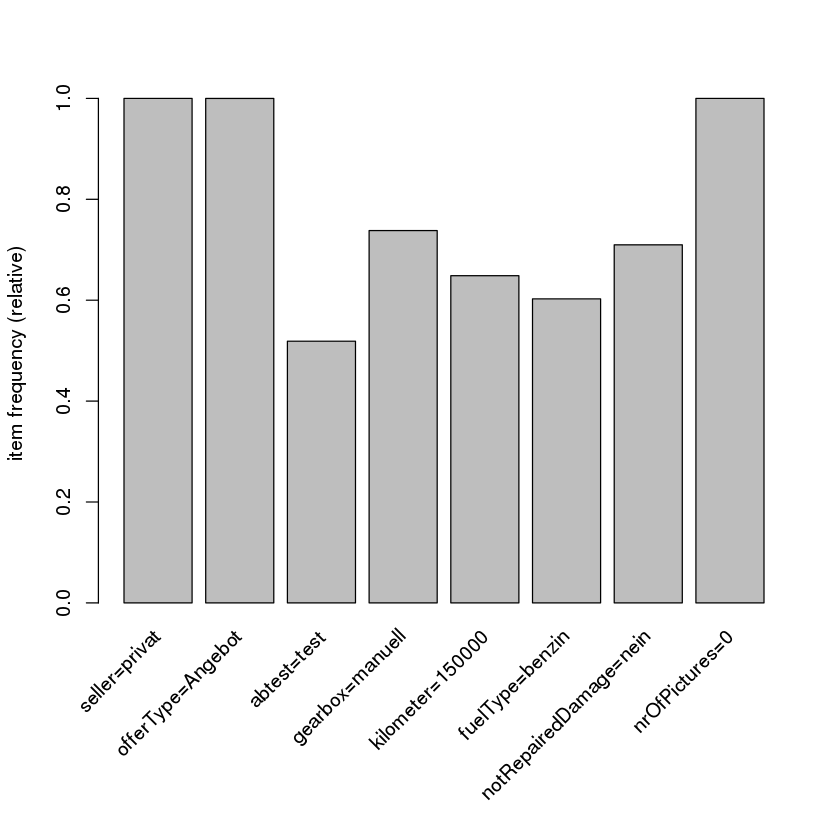

In [29]:
# code here..
itemFrequencyPlot(auto_trans, support = 0.5)


**Generate association rules for the transactions in auto_trans with support of 0.3 and confidence of 0.6

In [30]:
# code here..
rules <- apriori(auto_trans, parameter = list(support = 0.3, confidence = 0.6))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56804 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[141549 item(s), 189349 transaction(s)] done [0.42s].
sorting and recoding items ... [9 item(s)] done [0.03s].
creating transaction tree ... done [0.09s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [480 rule(s)] done [0.00s].
creating S4 object  ... done [0.06s].


In [31]:
library("arulesViz")

Loading required package: grid


**Draw a scatter plot for the generated rules using 'support' as the measure and 'confidence' for shading.

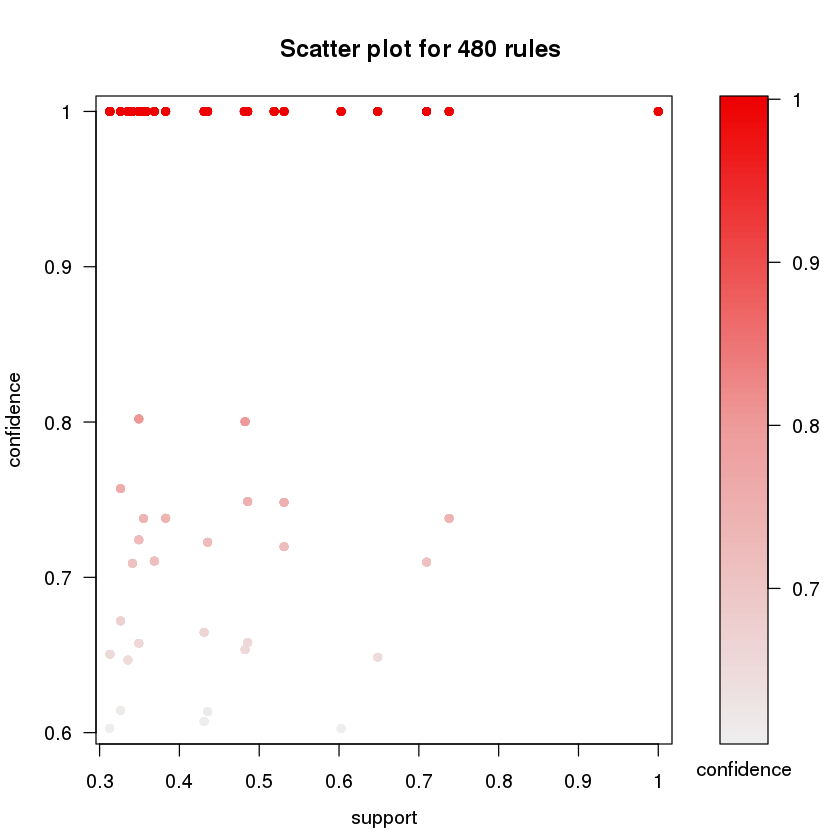

In [32]:
# code here..

plot(rules, method = "scatter", measure = "support", shading = "confidence", interactive = FALSE, data = auto_sales,)

**Draw a matrix plot for the generated transactions using measures 'confidence', 'lift'. Draw the plot with ordered transactions.

Itemsets in Antecedent (LHS)
  [1] "{seller=privat,gearbox=manuell,notRepairedDamage=nein}"                                    
  [2] "{seller=privat,gearbox=manuell,notRepairedDamage=nein,nrOfPictures=0}"                     
  [3] "{gearbox=manuell,notRepairedDamage=nein,nrOfPictures=0}"                                   
  [4] "{gearbox=manuell,notRepairedDamage=nein}"                                                  
  [5] "{offerType=Angebot,gearbox=manuell,notRepairedDamage=nein}"                                
  [6] "{seller=privat,offerType=Angebot,gearbox=manuell,notRepairedDamage=nein}"                  
  [7] "{seller=privat,offerType=Angebot,gearbox=manuell,notRepairedDamage=nein,nrOfPictures=0}"   
  [8] "{offerType=Angebot,gearbox=manuell,notRepairedDamage=nein,nrOfPictures=0}"                 
  [9] "{offerType=Angebot,gearbox=manuell,nrOfPictures=0}"                                        
 [10] "{seller=privat,offerType=Angebot,gearbox=manuell,nrOfPictures=0}"        

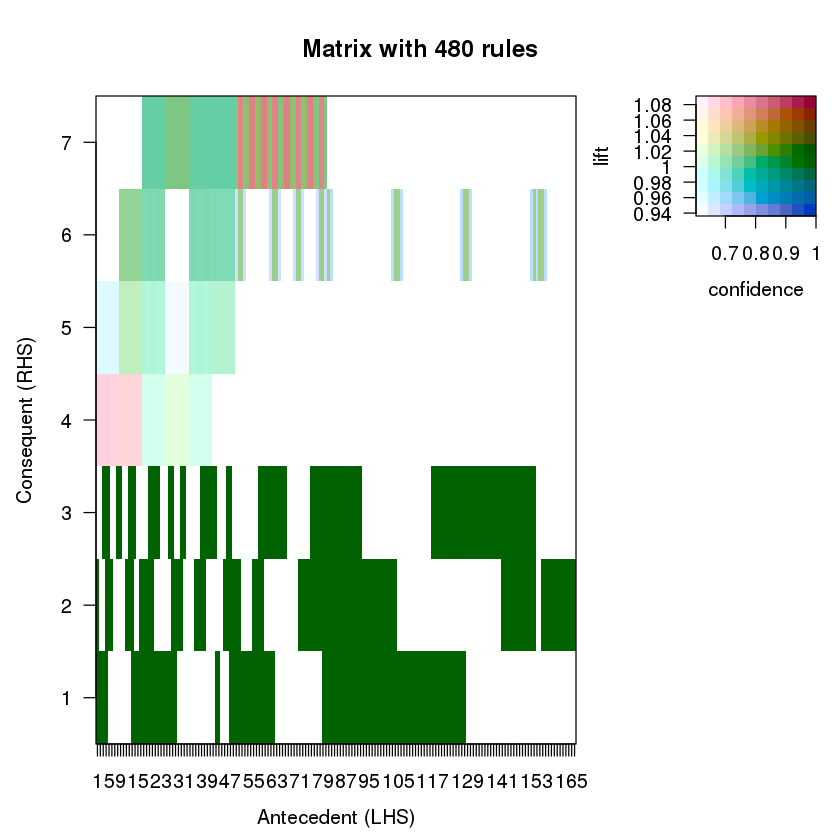

In [33]:
# code here..

plot(rules, method="matrix", measure=c("lift", "confidence"), control=list(reorder=TRUE))

**Draw a grouped matrix plot for the rules.

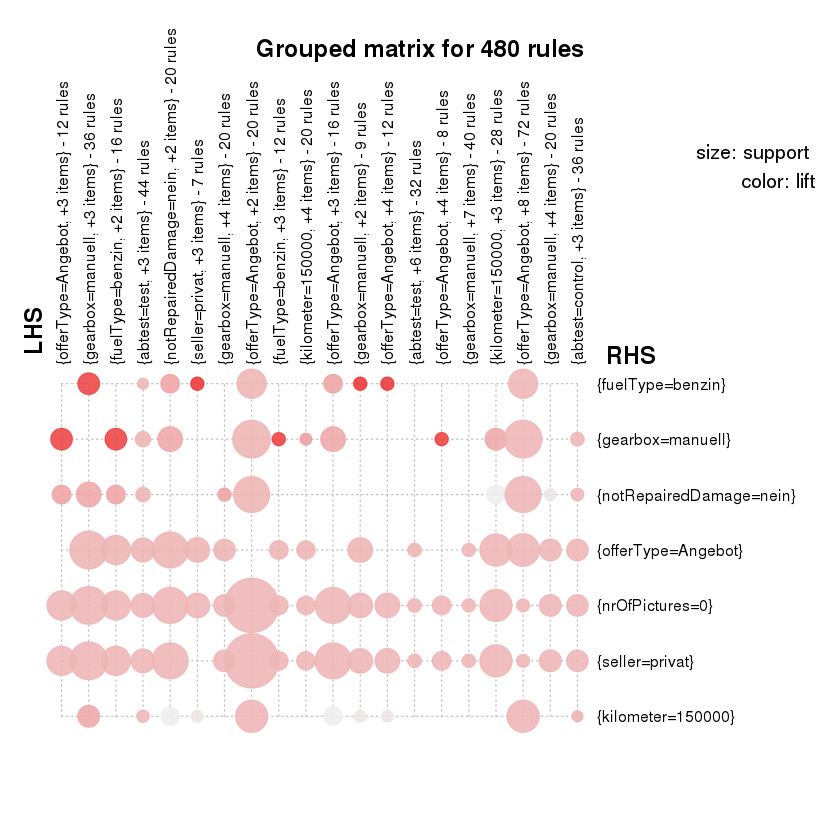

In [34]:
# code here..
plot(rules, method="grouped", k=20)


**Write the generated rules to a csv file called "auto_sales.csv"

In [37]:
write(rules, file = "rules_auto_sales.csv", sep = ",", col.names = NA)


In [35]:
# another way to write the file, but didn't work in our case. 
write.csv(rules, file = "rules_auto_sales.csv")

ERROR: Error in as.data.frame.default(x[[i]], optional = TRUE): cannot coerce class "structure("rules", package = "arules")" to a data.frame
